In this analysis, I am trying to .... TODO

First import the libraries needed. Install if not already installed.

In [1]:
%%bash -x
pip install --user lifelines

  Running setup.py bdist_wheel for autograd: started
  Running setup.py bdist_wheel for autograd: finished with status 'done'
  Stored in directory: C:\Users\bijno\AppData\Local\pip\Cache\wheels\42\62\66\1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\bijno\AppData\Local\pip\Cache\wheels\8b\99\a0\81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built autograd future


+ pip install --user lifelines
thinc 6.10.3 has requirement cymem<1.32.0,>=1.30.0, but you'll have cymem 2.0.2 which is incompatible.
thinc 6.10.3 has requirement preshed<2.0.0,>=1.0.0, but you'll have preshed 3.0.2 which is incompatible.
autograd-gamma 0.4.1 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import hdbscan
from pandas.plotting import parallel_coordinates
import prince
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from lifelines import CoxPHFitter
from lifelines.utils import median_survival_times, qth_survival_times

In [3]:
devices = pd.read_csv('F:\\rev\\rev-devices.csv')
notifications = pd.read_csv('F:\\rev\\rev-notifications.csv')
transactions = pd.read_csv('F:\\rev\\rev-transactions.csv')
users = pd.read_csv('F:\\rev\\rev-users.csv')

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)

In [ ]:
# for supressing warnings
import warnings
warnings.filterwarnings("ignore")

Then I view the data.

In [5]:
users.head(5)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0
1,user_1,1975,GB,London,2018-01-29 03:38:46.676876,0,STANDARD,NaN,NaN,21,0,0
2,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,STANDARD,0.0,0.0,21,0,0
3,user_3,1994,FR,Paris,2018-01-15 18:47:56.723104,0,STANDARD,1.0,0.0,0,0,0
4,user_4,1985,GB,Beckenham,2018-01-11 00:36:46.673673,0,STANDARD,NaN,NaN,2,0,0


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 12 columns):
user_id                                     19430 non-null object
birth_year                                  19430 non-null int64
country                                     19430 non-null object
city                                        19430 non-null object
created_date                                19430 non-null object
user_settings_crypto_unlocked               19430 non-null int64
plan                                        19430 non-null object
attributes_notifications_marketing_push     12820 non-null float64
attributes_notifications_marketing_email    12820 non-null float64
num_contacts                                19430 non-null int64
num_referrals                               19430 non-null int64
num_successful_referrals                    19430 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


In [7]:
users.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
count,19430.000000,19430.000000,12820.000000,12820.000000,19430.000000,19430.0,19430.0
mean,1983.648636,0.181009,0.947582,0.895944,17.887699,0.0,0.0
std,11.368871,0.385035,0.222877,0.305345,46.506438,0.0,0.0
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1978.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,1986.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0
max,2001.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0


Similarly, I view the other three datasets to have initial understanding of the data.

In [104]:
print(users.columns, '\n', transactions.columns, '\n', devices.columns, '\n', notifications.columns)

Index(['user_id', 'country', 'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'user_created', 'users_created_year', 'users_created_month',
       'generations', 'brand'],
      dtype='object') 
 Index(['transaction_id', 'transactions_type', 'amount_usd',
       'ea_cardholderpresence', 'direction', 'user_id', 'transaction_created',
       'transactions_created_year', 'transactions_created_month'],
      dtype='object') 
 Index(['brand', 'user_id'], dtype='object') 
 Index(['reason', 'channel', 'status', 'user_id', 'notif_created'], dtype='object')


Using these, I designed some hypothesis which could impact engagement or churn as follows:

- user generation (H0: user belonging to gen z will be more likely to be engaged)
- country (H0: users from one country are more likely to transact)
- user_settings_crypto_unlocked (H0: users having their crypto setting unlocked are more likely to be engaged)<br>
- plan (H0: users under different plans show different engagement<br>
- num_contact (H0: users having more contacts are more likely to be engaged) <br>
- device type of user (H0: android users are more likely to be engaged) 
- transaction direction (H0: users doing more num inbound transactions are more likely to be engaged)
- num notifications sent (H0: more notifications sent will likey attract user to be engaged)
- notification type (H0: different notification type have different impact on user engagement)
- reason (H0: one reason is more significant than other in predicting engagement)


Now I clean the data and create the datasets to be used.

In [9]:
# Drop columns which will not be used
users = users.drop(columns=['city', 'num_referrals', 'num_successful_referrals'])
transactions = transactions.drop(columns=['transactions_currency','ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country'])

In [10]:
# Handle Dates
users['user_created']= pd.to_datetime(users['created_date']).dt.date
users = users.drop(columns=['created_date'])

transactions['transaction_created']= pd.to_datetime(transactions['created_date']).dt.date
transactions = transactions.drop(columns=['created_date'])

notifications['notif_created']= pd.to_datetime(notifications['created_date']).dt.date
notifications = notifications.drop(columns=['created_date'])

users['users_created_year'] = pd.to_datetime(users['user_created']).dt.year
users['users_created_month'] = pd.to_datetime(users['user_created']).dt.month

transactions['transactions_created_year'] = pd.to_datetime(transactions['transaction_created']).dt.year
transactions['transactions_created_month'] = pd.to_datetime(transactions['transaction_created']).dt.month

Clean User data

In [11]:
def binning(col, cut_points, labels=None, minmax=False):
    #Define min and max values:
    if minmax:
        minval = col.min()
        maxval = col.max()

    #create list by adding min and max to cut_points
    try:
        break_points = [minval] + cut_points + [maxval]
    except UnboundLocalError:
        break_points = cut_points

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

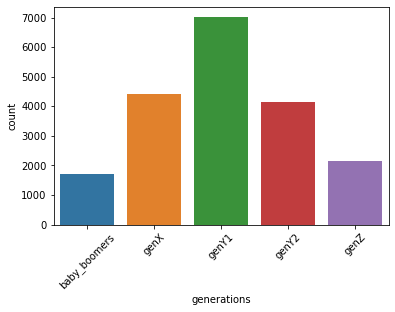

In [12]:
'''
Bin users to various generations
Baby Boomers: 1944 to 1964
Gen X: 1965 - 1979
Gen Y or Millennials: 1980 and 1994
Gen Y.1 = 1980-1990
Gen Y.2 = 1990-1994
Gen Z: 1995 and 2015
'''
#Binning age:
cut_points = [0,1965,1980,1990,1995,2100]
labels = ['baby_boomers','genX','genY1','genY2', 'genZ']
users['generations'] = binning(users['birth_year'], cut_points, labels)
users = users.drop(columns='birth_year')

sns.countplot(x='generations', data=users)
plt.xticks(rotation=45)


The genrations follow typical normal distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

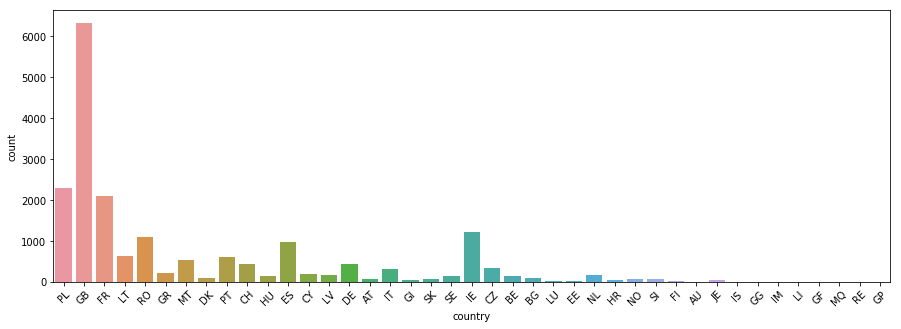

In [245]:
sns.countplot(x='country', data=users)
plt.xticks(rotation=45)

In [13]:
# merge user data with devices data
print(len(users))
users = pd.merge(users, devices, on='user_id')
print(len(users))
users.head(2)

19430
19430


I printed out the length of the datasets twice to make sure the sanctity of the data.

In [177]:
# handle notifications data
print(len(notifications))
notifications = notifications[notifications['status']=='SENT']
notifications = notifications.drop(columns='status')
print(len(notifications))
notifications.head(2)

56868
40227


,reason,channel,user_id,notif_created
249,REENGAGEMENT_ACTIVE_FUNDS,PUSH,user_1426,2019-01-04
291,REENGAGEMENT_ACTIVE_FUNDS,PUSH,user_8048,2019-01-04


In [14]:
# Only completed transactions are considered
print(len(transactions))
transactions = transactions[transactions['transactions_state']=='COMPLETED']
transactions = transactions.drop(columns='transactions_state')
print(len(transactions))
transactions.head(2)

2740075
2407968


,transaction_id,transactions_type,amount_usd,ea_cardholderpresence,direction,user_id,transaction_created,transactions_created_year,transactions_created_month
0,transaction_0,TRANSFER,4.55,NaN,OUTBOUND,user_898,2018-04-03,2018,4
1,transaction_1,CARD_PAYMENT,15.50,FALSE,OUTBOUND,user_1652,2019-03-19,2019,3


Various ways of interpreting the column 'direction' in transactions table<br>
- INBOUND (inter country transaction) and OUTBOUN (intra country transaction)
- INBOUND (money received which doesn't mean user involvement) and OUTBOUND (money sent which signifies user involvement)
- INBOUND (money received when requested by the user or put from the bank or something similar which mean user involvement) and OUTBOUND (money sent which signifies user involvement). This interpretation is considered while analysing the data

Now, let's merge the datasets of users and transactions for identifying the engagement metric

In [21]:
ut = pd.merge(users, transactions, how='outer', on='user_id')
ut.user_id.nunique()

19430

Quality check the merged data

In [17]:
print(len(users), len(transactions), len(ut))
print(sum(transactions.amount_usd)-sum(ut.amount_usd))

19430 2407968 2407968
4.869699478149414e-05


In [18]:
max_date = pd.Timestamp(max(ut.transaction_created)).date()
min_date = pd.Timestamp(min(ut.user_created)).date()
print('we have', (max_date - min_date).days, 'days of transaction data from', min_date, 'to', max_date)

overlapping_min = max(ut.user_created)
overlapping_max = max(ut.transaction_created)
print('we have', (overlapping_max - overlapping_min).days, 'days of transaction overlapping between all users from', 
      overlapping_min, 'to', overlapping_max)


we have 499 days of transaction data from 2018-01-01 to 2019-05-15
we have 132 days of transaction overlapping between all users from 2019-01-03 to 2019-05-15


Let's consider last 4 months of transacted data for our analysis on seller engagement and get total Transaction Amount (TA) per user per day.

In [30]:
# Method for converting into crosstab
def get_transaction_crosstab(ut_comp, col_x, col_y, col_val, agg_func, drop_all=True):
    data = ut_comp[[col_x, col_y, col_val]]
    data2 = pd.DataFrame(pd.crosstab(data[col_x], data[col_y], values=data[col_val], aggfunc=agg_func, margins=True))
    data2 = data2.drop(columns='All')

    if drop_all:
        try:
            data2 = data2.drop(columns=0)
        except KeyError:
            pass

        # delete the row
        data2 = data2.drop('All')

    data2 = data2.fillna(0)
    return data2

# quality check the data
def get_data_min_max(data):
    dataset_min = min(data.min())
    dataset_max = max(data.max())
    #print(dataset_min)
    #print(dataset_max)
    return dataset_min, dataset_max

In [31]:
ut_comp = ut[ut['transaction_created']>overlapping_min]
ut_comp['D'] = (ut_comp.transaction_created-overlapping_min).dt.days

data = get_transaction_crosstab(ut_comp, 'user_id', 'D', 'amount_usd', 'sum')

# check data sanctity
print(get_data_min_max(data))

data.head(5)

C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.0, 325722.25)


In [178]:
print(notifications.shape)
notifications = notifications[notifications['notif_created']>overlapping_min]
print(notifications.shape)


(40227, 4)
(40227, 4)


Now we have our datasets created:
- users (merged with users)
- transactions
- notifications
- data (crosstab of users and transactions in last D days) <br>
Let's remove outliers using z-test

In [34]:
z = np.abs(stats.zscore(data))
threshold = 3
data_o = data[(z < threshold).all(axis=1)]
print(len(data_o))
data_o.describe()

11771


D,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
count,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.00000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.00000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.00000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.00000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.000000,11771.0
mean,12.564488,16.187546,9.198402,8.113334,10.243975,9.610414,10.005930,11.567431,11.754593,8.898248,8.159908,12.051151,11.247746,10.913486,11.049710,12.155280,9.342404,6.749028,10.366241,10.935489,11.771612,12.210258,15.522849,11.332608,10.542527,12.167998,12.466294,14.331155,15.775519,14.595059,11.702412,9.744065,11.260872,13.178207,12.762913,11.972294,13.826736,12.325979,10.188888,13.754664,12.523978,11.391302,12.564355,13.882515,9.659209,8.160939,10.903384,11.308608,11.409222,10.915149,13.539219,10.646779,10.089614,11.525902,14.606197,14.666989,17.060484,20.38259,14.848760,10.612538,12.724538,15.459365,13.430959,13.68351,14.161233,11.691251,10.913332,11.948149,12.474328,12.373554,13.971365,13.929446,12.414704,9.279920,13.097232,12.141477,12.696305,12.102331,14.495099,11.634775,10.281804,14.413890,13.887027,13.435094,16.01880,19.025553,15.088272,10.466165,15.680823,16.149346,14.522653,16.222662,14.379749,12.796948,11.449419,12.582968,12.649987,11.588192,13.704006,12.761230,11.045666,8.566543,10.843979,12.664391,12.839116,14.495269,12.986846,12.286050,7.877085,10.373413,12.980448,14.519116,16.93493,16.911224,12.710477,10.906455,14.146691,18.152952,15.615661,19.048315,19.873783,14.201312,10.219999,14.201837,3.904269,8.206129,9.685319,6.270186,1.205895,0.038870,0.003000,0.0
std,64.936974,109.433708,42.484109,40.558178,56.182376,50.055526,52.870208,62.761716,58.850865,41.341464,42.196522,80.905318,75.489550,71.501845,60.430902,60.353261,42.532415,34.129063,55.301183,68.001207,75.706805,63.550808,80.144820,52.726993,57.741958,72.337364,80.515875,83.478029,86.881015,64.170494,48.615391,43.596138,51.335217,71.671554,85.005056,62.970949,69.427295,56.975370,48.666031,93.678365,77.344554,61.399130,66.641804,65.240936,38.421524,36.328072,54.701706,59.790687,56.557640,53.843815,64.657748,46.452433,46.975640,60.379987,78.672508,76.315892,88.99

The total num of data points thus are reduced to 11k. Let's remove the censored users (which have no event, in this case no transaction in last 60 days or 2 months). We will consider the remaining users for engagement analysis.

In [39]:
data_eng = data_o[data_o.iloc[:, -50:].sum(axis = 1) > 0]
len(data_eng)

9395

Let's remove noise (take average of last 'd' number of days) and scalarize the data between 0 to 1.
For determining 'd', let's analise frequency of the transactions or session interval.

session_interval = average time spent between two transactions

In [52]:
def session_interval_df(ut_comp, data_eng):
    ut = ut_comp[ut_comp['user_id'].isin(data_eng.index)]
    ut_sorted = ut.sort_values(['user_id', 'transaction_created'], ascending=[True, True]).reset_index(drop=True)
    data = ut_sorted[['user_id', 'transaction_created', 'amount_usd']]

    data['user_id_shift'] = data['user_id'].shift(1) # not necessary, will be faster
    data['transaction_created_shift'] = data['transaction_created'].shift(1)

    data['time_diff'] = np.where(data['user_id_shift']==data['user_id'], (data['transaction_created']-data['transaction_created_shift']).dt.days, 0)

    return data

si_data = session_interval_df(ut_comp, data_eng)

si_data_total = si_data[['user_id', 'time_diff']].describe()
print(si_data_total)
print('=> mean of the time difference for the whole data (between two transactions) is', si_data_total.loc['mean'].values[0], 'days')
print()

si_data_within = si_data[['user_id', 'time_diff']].groupby('user_id').mean().describe()
print(si_data_within)
print('=> mean of users'' mean time difference, i.e. mean within groups (groups being users) is', si_data_within.loc['mean'].values[0], 'days')

# Let's take d as:
d = int(si_data_within.loc['mean'].values[0])

C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

           time_diff
count  662884.000000
mean        1.300393
std         4.671552
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       126.000000
=> mean of the time difference for the whole data (between two transactions) is 1.3003934323350692 days

         time_diff
count  9395.000000
mean      4.152293
std       5.678992
min       0.000000
25%       0.937500
50%       2.243243
75%       5.000000
max      63.000000
=> mean of users mean time difference, i.e. mean within groups (groups being users) is 4.152292693980626 days


In [50]:
# methods to remove noise and scalarize the data
def remove_noise(df, n=5):
    df_cumsum = df.cumsum(axis=1) 
    df_cumsum2 = df_cumsum.shift(periods=n,axis=1).fillna(0)#,fill_value=0)
    chk = df_cumsum-df_cumsum2
    for i in range(1,n-1):
        chk[i] = df[i]
    return chk

def scalarize_data(dataset):
    dataset_min = min(dataset.min())
    dataset_max = max(dataset.max())
    dataNorm=((dataset-dataset_min)/(dataset_max-dataset_min))
    return dataNorm

def num_engaged_users(scalar_data, val):
    engaged_users = []
    for column in scalar_data:
        engaged_users.append(len(scalar_data[(scalar_data[column]>val)]))#.count())
    tot = sum(engaged_users)
    print('Num users*days considered engaged with threshold', val, ':', tot)#.count())
    return engaged_users
    
def num_engaged_days_users(scalar_data):
    for val in range(0,10,1):
        i = 0
        for column in scalar_data:
            if scalar_data[column].max()>val/10:
                i += 1
        print('threshold=', val/10, 'Num days where there''s engagement:',i)
        num_engaged_users(scalar_data, val/10)
        i = 0
    for column in scalar_data:
        if scalar_data[column].max()>0.05:
            i += 1
    print('threshold=', 0.05, 'Num days where there''s engagement:', i)
    num_engaged_users(scalar_data, 0.5)


From the crosstab having Transaction Amount (TA) per day per user, clean the data removing noise (by taking average of last 4 days) followed by rescaling it between 0 to 1. We have our final metric as Scaled TA (STA) which is considered for engagement analysis.

In [53]:
scalar_data = scalarize_data(remove_noise(data_eng, n=int(d)))
scalar_data = scalar_data*100
scalar_data = scalar_data.round(2)

print(get_data_min_max(scalar_data))

num_engaged_days_users(scalar_data)

(0.0, 100.0)
threshold= 0.0 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.0 : 496662
threshold= 0.1 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.1 : 433519
threshold= 0.2 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.2 : 387112
threshold= 0.3 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.3 : 353630
threshold= 0.4 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.4 : 328311
threshold= 0.5 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.5 : 307239
threshold= 0.6 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.6 : 289302
threshold= 0.7 Num days where theres engagement: 132
Num users*days considered engaged with threshold 0.7 : 271606
threshold= 0.8 Num days where theres engagement: 132
Num users*days

Reasoning behind selection of the engagement metric:<br>
- Business -> considered transaction volume, as with increase in transaction volume i.e. amount, users' increased trust could be inferred. Transaction amount of the completed transactions is considered<br>
- Normalized -> use currency convertor on the transaction amount. Not required as amount_usd is given <br>
- Remove noise -> take average of last d num of days (instead of avg, sum is taken, as anyway we are rescaling the data)<br>
- Rescaled -> rescaled data, so make it stable

For calibrating engagement at daily level, STA can be considered. Let's say engaged users are STA>0.75 and unengaged users are STA<0.25 which is determined at daily level. In order to calculate long term engagement, let's carry out cluster analysis on the crosstab data.

Let's implement clustering to identify different groups. For clustering, I prefer density based clustering, as it doesn't require num of clusters and is shape independent. It works well in high dimensional space.<br>In this case, I have used HDBSCAN for clustering. And canberra distance metric. For high dimensional data, refer: <br>
Shirkhorshidi, A.S., Aghabozorgi, S. and Wah, T.Y., 2015. A comparison study on similarity and dissimilarity measures in clustering continuous data. PloS one, 10(12), p.e0144059.<br>
The only hyper-parameter to be handled is the min num of points in a cluster. It also gives probability of assining a data point to a cluster. It also handles noise, since all the points are not assigned to a cluster.

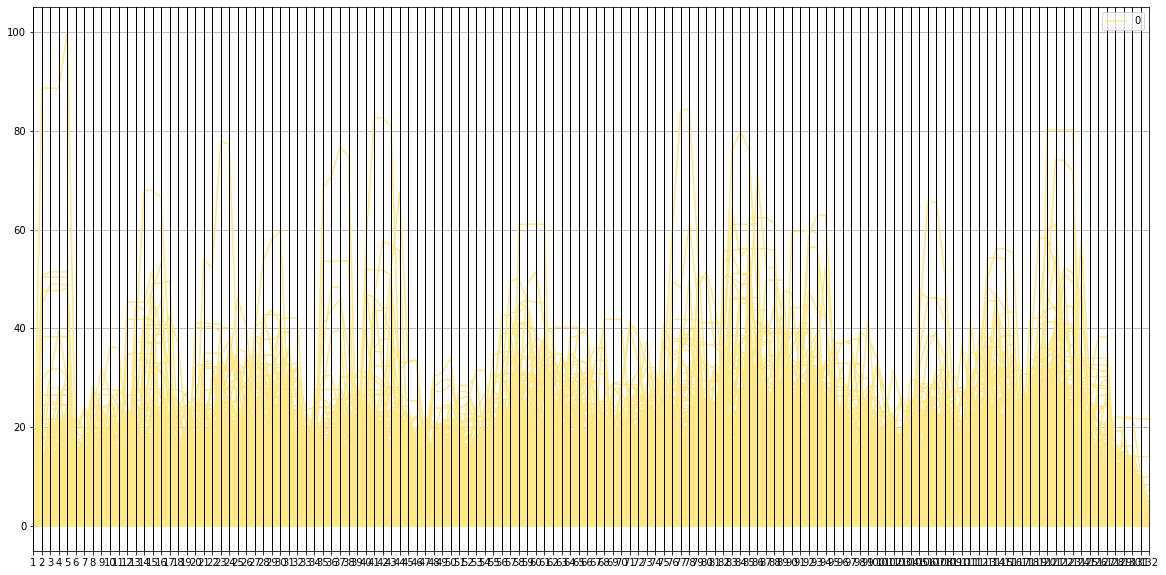

In [77]:
# Parallel coordinates data for all the users
scalar_data['default'] = 0
plt.rcParams["figure.figsize"] = (20,10)
pc = parallel_coordinates(scalar_data, 'default', color=('#FFE888'))

In [57]:
# Make clusters
def hdbscan_clusters(hdbscan_data, cluster_size=100, var=10):
    clusterer = hdbscan.HDBSCAN(metric='canberra', min_cluster_size=cluster_size)
    #clusterer.fit(hdbscan_data.iloc[:, -(var+rnd):-rnd]) # take random columns
    clusterer.fit(hdbscan_data.iloc[:, -var:]) # take random columns
    return clusterer.labels_.max()+1, clusterer.labels_, clusterer.probabilities_

In [78]:
# for fitting the clusters, take last 45 days (1.5 month) of data
num_clusters, labels, probabs = hdbscan_clusters(scalar_data.drop(columns='default'), cluster_size=50, var=45)
print('total num of clusters:', num_clusters)
print('Cluster frequency')
print(stats.itemfreq(labels))

total num of clusters: 6
Cluster frequency
[[  -1 8625]
 [   0  202]
 [   1   59]
 [   2  262]
 [   3   72]
 [   4  122]
 [   5   53]]


C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


-1 are the outliers, which couldn't fit well to any group. Let's now view the clusters

In [90]:
cluster = pd.DataFrame()
cluster = cluster.reindex(scalar_data.index)
cluster['groups'] = labels.tolist()

# Let's plot for last 45 days
par_cor = pd.concat([scalar_data.drop(columns='default').iloc[:, -var:], cluster['groups']], axis=1)
plt.rcParams["figure.figsize"] = (20,5)

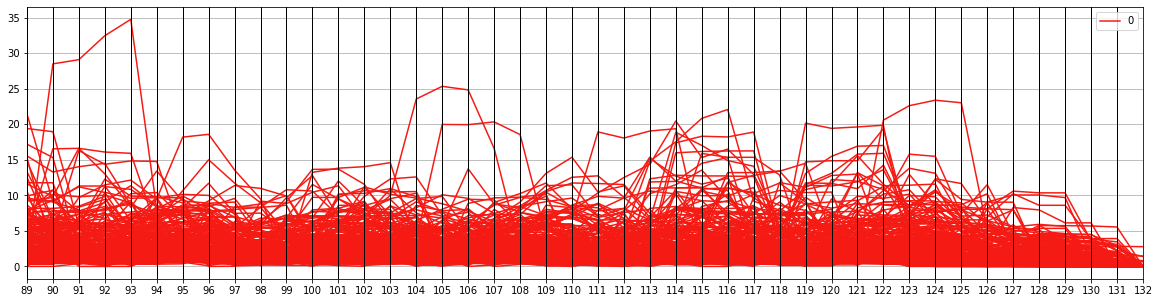

In [102]:
plt.rcParams["figure.figsize"] = (20,5)
parallel_coordinates(par_cor[par_cor['groups']==0].iloc[:,-45:].iloc[:,-45:], 'groups', color=('#f51b14'))

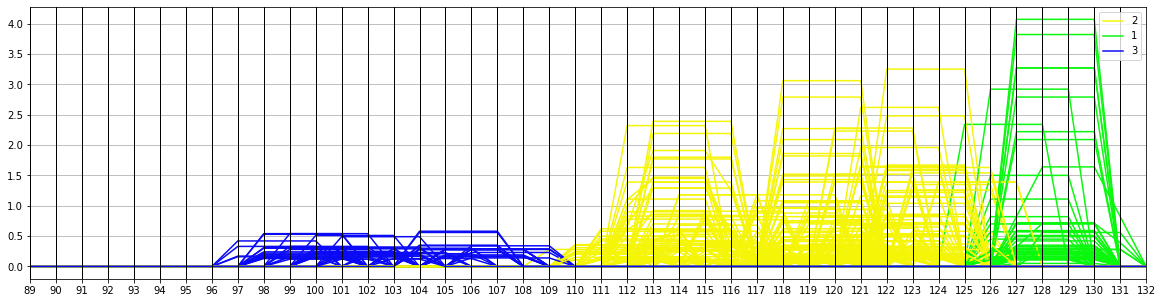

In [105]:
parallel_coordinates(par_cor[par_cor['groups'].isin([1,2,3])].iloc[:,-45:], 'groups', color=('#f5f507', '#0af70e', '#0a0af7'))

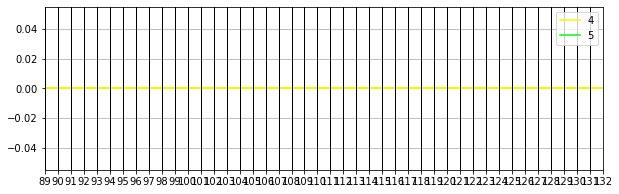

In [106]:
plt.rcParams["figure.figsize"] = (10,3)
parallel_coordinates(par_cor[par_cor['groups'].isin([4,5])].iloc[:,-45:], 'groups', color=('#f507c1', '#b0fff8'))

Looking at the above results and the three plots, a clear structure in the data could be seen:<br>
group 0: Long term Engaged users <br>
group 1,2,3: Irregularly Engaged users <br>
group 4,5: Long term non-engaged users

Now that we have engaged and unengaged users, let's build a model. It is a typical binary classification problem

Prepare user data for Logistic Regression

In [ ]:
par_cor.replace({'A': {0: 100, 4: 400}})

In [251]:
def get_model_df(users):
    par_cor['user_id'] = par_cor.index
    
    data = pd.merge(ut_comp, par_cor['groups'], on='user_id')
    u = pd.merge(users, par_cor['groups'], on='user_id')

    a = data[(overlapping_max-data['transaction_created']).dt.days>30].groupby(['user_id', 'direction'])['transaction_id'].count().unstack()
    b = notifications[(overlapping_max-notifications['notif_created']).dt.days>30].groupby(['user_id'])['notif_created'].count()
    d = notifications[(overlapping_max-notifications['notif_created']).dt.days>30].groupby(['user_id', 'reason'])['notif_created'].count().unstack()

    u = pd.merge(u, pd.DataFrame(a['INBOUND']-a['OUTBOUND']), on='user_id', how='left')

    u = pd.merge(u, pd.DataFrame(b).notif_created, on='user_id', how='left') # rename column

    for col in d.columns:
        u = pd.merge(u, d[col], on='user_id', how='left')

    u = u.rename(columns={0: 'inbound_outbound_diff_1M', 'EMAIL':'num_notif_email_1M',
                                        'PUSH':'num_notif_push_1M', 'notif_created':'num_notif_1M'})
    u = u.drop(columns=['user_created', 'users_created_year', 'users_created_month'])
    u = u.replace({'groups': {2:1, 3: 1}}) # Irregular engaged
    u = u.replace({'groups': {4:2, 5: 2}}) # Unengaged
    
    for c in u.columns:
        try:
            u[c] = u[c].fillna(0)
        except ValueError:
            u[c] = u[c].cat.add_categories('Unknown')
            u[c] = u[c].fillna('Unknown', inplace =True)

    u['generations'] = users['generations']
            
    return u

In [252]:
users_df = get_model_df(users)
users_df.shape

(9395, 25)

In [200]:
users_df.columns

Index(['user_id', 'country', 'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'generations', 'brand', 'groups', 'inbound_outbound_diff_1M',
       'num_notif_1M', 'num_notif_email_1M', 'num_notif_push_1M',
       'ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'FIFTH_PAYMENT_PROMO',
       'JOINING_ANNIVERSARY', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'METAL_GAME_START',
       'NO_INITIAL_CARD_ORDER', 'NO_INITIAL_CARD_USE',
       'NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PREMIUM_ENGAGEMENT_FEES_SAVED',
       'REENGAGEMENT_ACTIVE_FUNDS', 'WELCOME_HOME'],
      dtype='object')

In [253]:
features1 = ['country', 'num_contacts', 'inbound_outbound_diff_1M'] 
features2 = ['user_settings_crypto_unlocked', 'plan', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 
             'generations', 'brand', 'num_notif_1M', 
       'ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'FIFTH_PAYMENT_PROMO',
       'JOINING_ANNIVERSARY', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'METAL_GAME_START',
       'NO_INITIAL_CARD_ORDER', 'NO_INITIAL_CARD_USE',
       'NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PREMIUM_ENGAGEMENT_FEES_SAVED',
       'REENGAGEMENT_ACTIVE_FUNDS', 'WELCOME_HOME']
print(len(features1)+len(features2))


23


In [341]:
model_df = users_df[users_df['groups'].isin([0,2])]
model_df.shape

(377, 25)

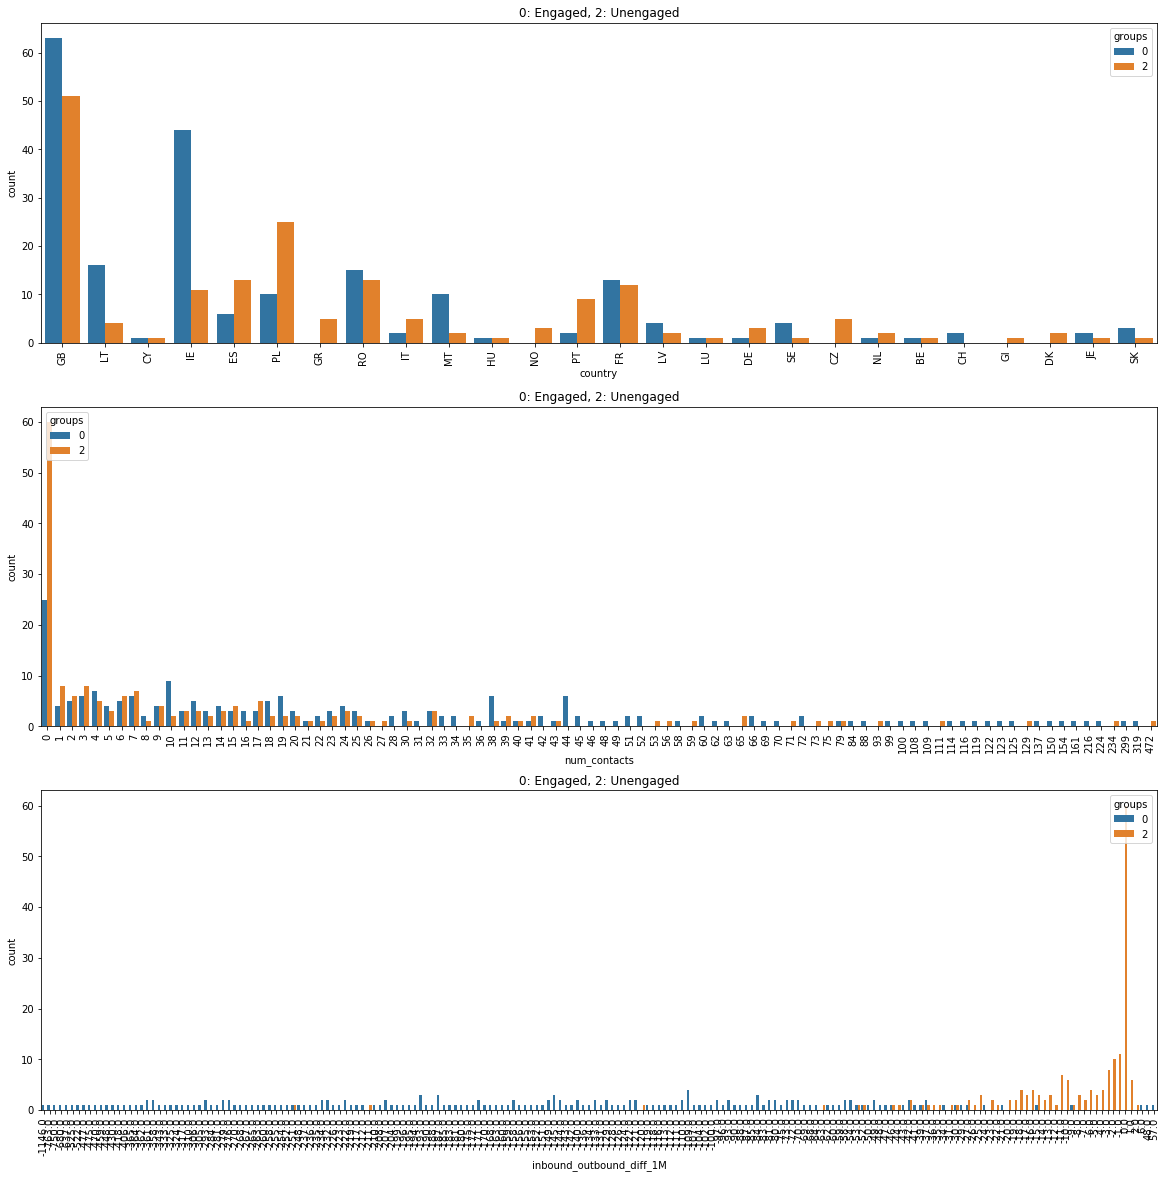

In [263]:
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features1):
    plt.subplot(3, 1, i+1)
    # plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=model_df, hue='groups') 
    plt.xticks(rotation=90)
    plt.title("0: Engaged, 2: Unengaged")

# for countries
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

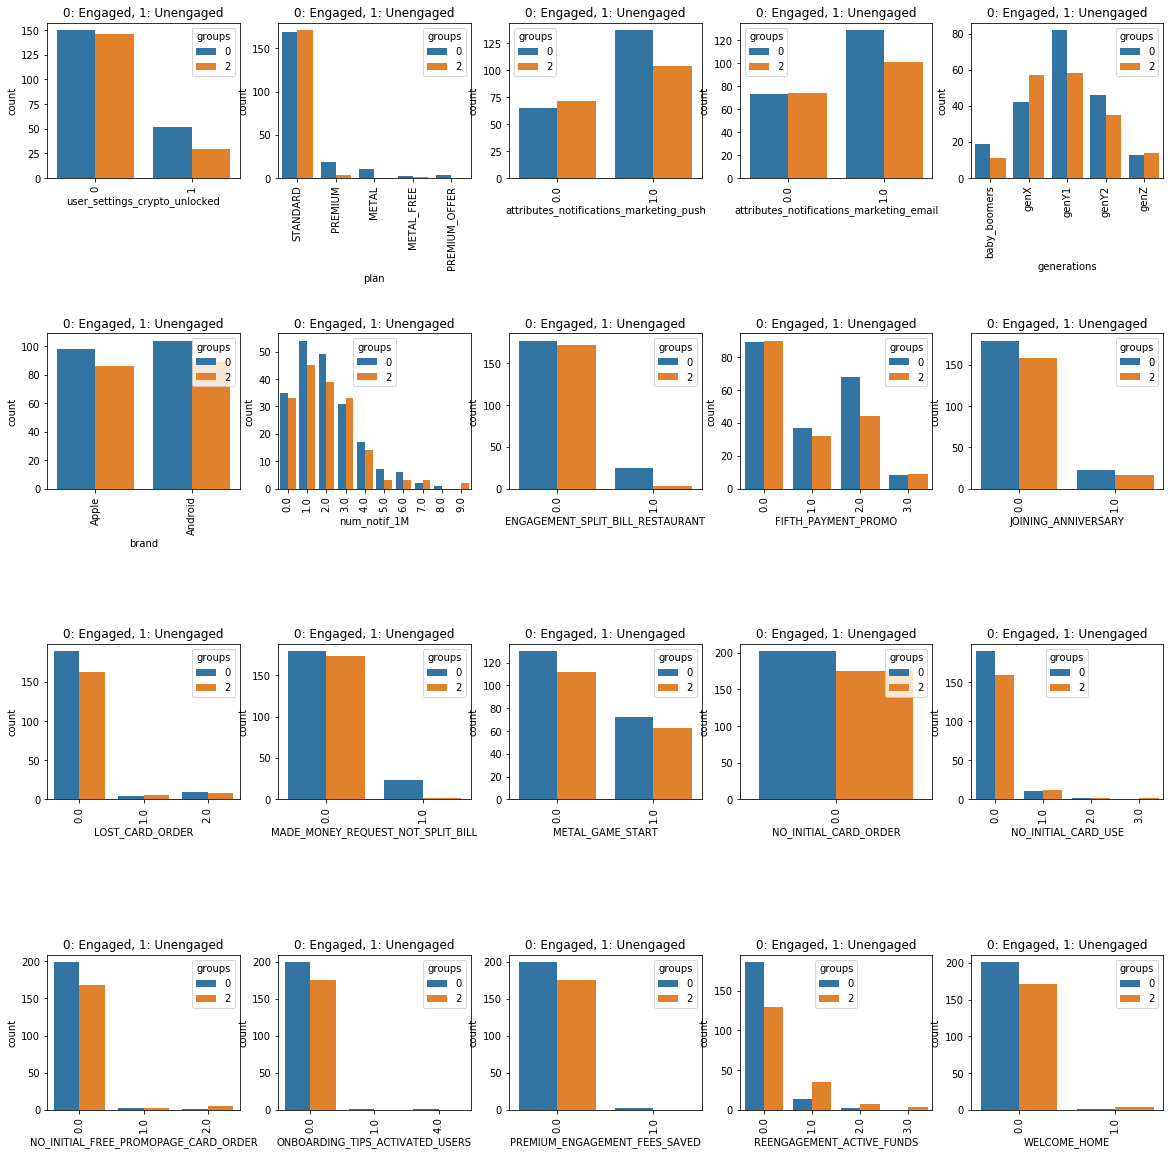

In [261]:
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features2):
    plt.subplot(4, 5, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=model_df, hue='groups') 
    plt.xticks(rotation=90)
    plt.title("0: Engaged, 2: Unengaged")

In [362]:
def cat_data_handling(model_df):
    model_df['android_users'] = model_df['brand'].apply(lambda x: 1 if x=='Android' else 0)
    
    age_group = pd.get_dummies(model_df['generations'], prefix='age_grp')
    model_df = pd.concat([model_df, age_group], axis=1)
    
    plan_df = pd.get_dummies(model_df['plan'], prefix='plan')
    model_df = pd.concat([model_df, plan_df], axis=1)
    
    model_df = model_df.drop(columns=['brand', 'generations', 'plan'])

    model_df['country'] = model_df['country'].astype('category').cat.codes
    
    model_df['groups'] = model_df['groups'].apply(lambda x: 1 if x==2 else 0)
    
    return model_df

def quality_check_model_data(model_df):
    for col in model_df.columns:
        chk = model_df[pd.notnull(model_df[col])]
        if chk.shape != model_df.shape:
            yield(col)
            
model_data = cat_data_handling(model_df)
print(list(quality_check_model_data(model_data)) if list(quality_check_model_data(model_data)) else None) # should return None

model_data.shape

None


(377, 33)

In [364]:
X = model_data.drop(columns=['user_id', 'groups'])
y = model_data['groups']

def feature_selection(X, y, num_features):
    logreg = LogisticRegression()
    rfe = RFE(logreg, num_features) # reduce the num of features to half
    rfe = rfe.fit(X, y.values.ravel())
    #print(rfe.support_)
    #print(rfe.ranking_)

    # get relevant columns
    def get_rel_col(rfe, rel_col = []):
        i = 0
        for c in rfe.support_:
            if c:
                rel_col.append(list(X)[i])
            i += 1
        return rel_col

    X=model_data[get_rel_col(rfe)]

    logit_model=sm.Logit(y, X)
    result=logit_model.fit(maxiter=30)
    print('for', num_features, 'num of features, model results are')
    print(result.summary2())
    
    return X

In [365]:
for i in range(10, 25, 4):
    feature_selection(X, y, num_features=i)

         Current function value: 0.573243
         Iterations: 30
for 10 num of features, model results are
                                                  Results: Logit
Model:                                Logit                            Pseudo R-squared:                 0.170     
Dependent Variable:                   groups                           AIC:                              452.2255  
Date:                                 2019-12-10 13:09                 BIC:                              491.5480  
No. Observations:                     377                              Log-Likelihood:                   -216.11   
Df Model:                             9                                LL-Null:                          -260.35   
Df Residuals:                         367                              LLR p-value:                      3.2963e-15
Converged:                            0.0000                           Scale:                            1.0000    
No. Iterations:

C:\Users\bijno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.556049
         Iterations: 30
for 14 num of features, model results are
                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.195     
Dependent Variable:            groups                      AIC:                         447.2607  
Date:                          2019-12-10 13:09            BIC:                         502.3121  
No. Observations:              377                         Log-Likelihood:              -209.63   
Df Model:                      13                          LL-Null:                     -260.35   
Df Residuals:                  363                         LLR p-value:                 8.7332e-16
Converged:                     0.0000                      Scale:                       1.0000    
No. Iterations:                30.0000                                                            
-------------------------------------------

C:\Users\bijno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.553415
         Iterations: 30
for 18 num of features, model results are
                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.199     
Dependent Variable:            groups                      AIC:                         453.2747  
Date:                          2019-12-10 13:09            BIC:                         524.0552  
No. Observations:              377                         Log-Likelihood:              -208.64   
Df Model:                      17                          LL-Null:                     -260.35   
Df Residuals:                  359                         LLR p-value:                 2.0567e-14
Converged:                     0.0000                      Scale:                       1.0000    
No. Iterations:                30.0000                                                            
-------------------------------------------

C:\Users\bijno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.195841
         Iterations: 30
for 22 num of features, model results are
                                                 Results: Logit
Model:                              Logit                            Pseudo R-squared:                 0.716     
Dependent Variable:                 groups                           AIC:                              191.6638  
Date:                               2019-12-10 13:09                 BIC:                              278.1731  
No. Observations:                   377                              Log-Likelihood:                   -73.832   
Df Model:                           21                               LL-Null:                          -260.35   
Df Residuals:                       355                              LLR p-value:                      3.4418e-66
Converged:                          0.0000                           Scale:                            1.0000    
No. Iterations:               

C:\Users\bijno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Looking at the p-values, select the columns (with p-val <0.05) to be considered for modelling and do a train test split

In [371]:
#model_cols = ['attributes_notifications_marketing_push', 'num_notif_1M', 'ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 
#              'NO_INITIAL_CARD_USE', 'NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER', 'age_grp_genY1', 'REENGAGEMENT_ACTIVE_FUNDS', 'plan_STANDARD']#'plan_METAL'] #'LOST_CARD_ORDER', 
model_cols = ['attributes_notifications_marketing_push', 'age_grp_genY1', 'REENGAGEMENT_ACTIVE_FUNDS', 'plan_STANDARD']#'plan_METAL'] #'LOST_CARD_ORDER', 

#model_cols = ['attributes_notifications_marketing_push', 'num_notif_1M', 'ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 
#              'NO_INITIAL_CARD_USE', 'age_grp_genY1', 'REENGAGEMENT_ACTIVE_FUNDS', 'plan_STANDARD']

In [372]:

X=model_data[model_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Accuracy of the model is', acc_log)


Accuracy of the model is 68.44


In [291]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8947368421052632


ValueError: pos_label=1 is not a valid label: array([0, 2], dtype=int64)

In [77]:
'''
models = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'KNeighborsClassifier',
          'GaussianNB', 'Perceptron', 'SGDClassifier', 'DecisionTreeClassifier']

# method to get the model accuracies
def get_model_accuracy(model, X_train, X_test, y_train, y_test):
    m = eval(model)()
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    #Accuracy of classifier on test dataset
    acc = round(m.score(X_test, y_test) * 100, 2)
    confusion_matrix = confusion_matrix(y_test, y_pred)
    return acc, confusion_matrix
'''

In [18]:

# Change iterrows (slow) TODO
def get_anova_data_list(anova_df):
    prev_usrid = None
    user_list = list()
    i = 0

    for index, rows in anova_df.iterrows():
        usrid = rows.user_id

        if usrid==prev_usrid:
            user_list[i-1].append(rows.time_diff)
        else:
            user_list.append(list())
            i += 1
        prev_usrid = usrid
    return user_list

def add_dead_users(user_list, users):
    # Handle users who have only one transaction, in that case the sub-list will be empty. Append that list with a value of zero
    for i in user_list:
        if len(i)==0:
            i.append(-1)
    # handle users who are not in transactions table
    list_to_extend = (len(users)-len(user_list))
    user_list.extend([[-1]]*list_to_extend)
    return user_list
    
# Quality check
def quality_check_anova(user_list):
    wrong_list = []
    for i in user_list:
        if len(i)==0:
            wrong_list.append(i)
    return wrong_list

let's check if the difference between the groups is statistically significant

In [142]:
for 
f_val, p_val = stats.f_oneway(par_cor[par_cor['groups'] == 0], par_cor[par_cor['groups'] == 1])
print('p val for anova for 25 variables:', p_val)

p val for anova for 25 variables: [4.73766345e-002 1.54882477e-001 2.80371868e-003 5.78452735e-008
 4.41554646e-017 1.71250390e-029 2.06255786e-045 2.72240712e-063
 1.75745978e-075 6.13255551e-099 5.60809546e-133 2.85707328e-138
 3.00130611e-137 3.28113859e-119 1.97994504e-111 2.21950258e-102
 6.46858399e-098 7.46184376e-091 3.29491332e-081 5.12962707e-049
 9.87986254e-030 2.59235693e-011 6.34758282e-006 3.76715368e-003
 8.62396487e-002             nan]


the above p-value means that the difference between some of the means is statistically significant, which tells that the users transact in different manners. <br>
We can also say that some users will be more engaged than others. Next is to define the metric for engagement

Num users*days considered engaged thusly: 32894
Num users*days considered engaged thusly: 5407
Num users*days considered engaged thusly: 1402
Num users*days considered engaged thusly: 405
Num users*days considered engaged thusly: 146
Num users*days considered engaged thusly: 54
Num users*days considered engaged thusly: 29
Num users*days considered engaged thusly: 15
Num users*days considered engaged thusly: 10


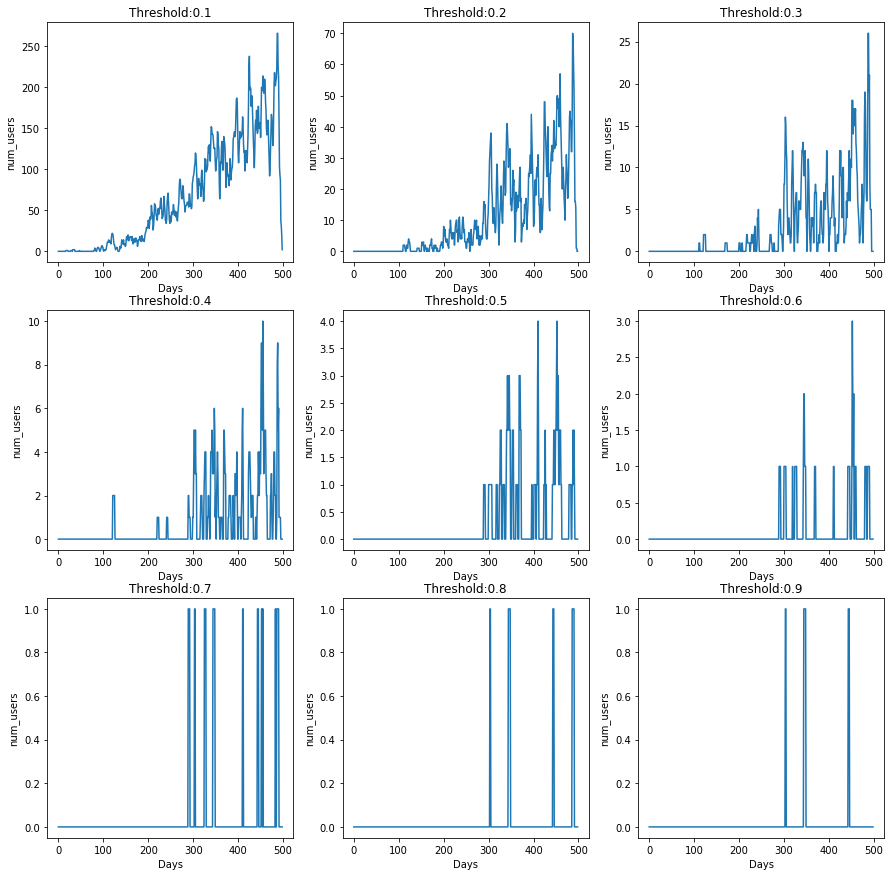

In [31]:
i = 0.1
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for ax in axs.flat:
    ax.plot(num_engaged_users(scalar_data_rm_o, i))
    ax.set_xlabel('Days')
    ax.set_ylabel('num_users')
    ax.set_title('Threshold:' + str(round(i, 2)))
    i += 0.1


## 7) Feature engineering - Feature Selection and FAMD

pca - keep orthogonal features

Factor Analysis of Mixed Data

In [358]:
X = users_df.drop('groups', axis='columns').reset_index()
X = users_df.drop('user_id',axis='columns').reset_index()

KeyError: "['user_id'] not found in axis"

In [40]:
famd_dict = {}
#X = users_df[users_df.columns[~users_df.columns.isin(['groups'])]]
#X = users_df.drop('groups', axis='columns')
X = users_df

for n in range(1,20):
    famd = prince.FAMD(n_components=n, random_state=42, n_iter=3, copy=True, check_input=True, engine='auto')
    # Remove target variable
    fa = famd.fit(X)#[['country', 'user_settings_crypto_unlocked']])  
    famd_dict[n] = fa.explained_inertia_


C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return cls(data, **kwargs)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1641: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_values, index=self.index, name=self.name)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self.default_fill_value,
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a re

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self.default_fill_value,
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6289: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_data).__finalize__(self)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5884: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> serie

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1641: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_values, index=self.index, name=self.name)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and w

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self.default_fill_value,
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6289: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_data).__finalize__(self)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5884: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> serie

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1641: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_values, index=self.index, name=self.name)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and w

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return cls(data, **kwargs)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


(0, 19)

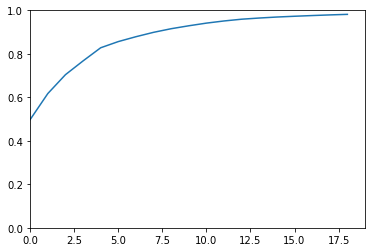

In [54]:
a = []
for k, v in famd_dict.items():
    a.append(sum(v))
plt.plot(a)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 19)

Let num of components be 10

In [97]:
famd = prince.FAMD(n_components=12, random_state=42, n_iter=3, copy=True, check_input=True, engine='auto')
# Remove target variable
fa = famd.fit(users_df)#[['country', 'user_settings_crypto_unlocked']])  
X_famd = famd.row_coordinates(X)

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

KeyError: "None of [Index(['brand', 'generations', 'country', 'plan'], dtype='object')] are in the [columns]"

## 8) Modelling

1) test train split on X_famd<br>
2) models<br>
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [98]:
acc_best = 0
model_best = None
acc = []
model_fit = []
for m in models:
    a, con, mf = get_model_accuracy(m)
    acc.append(a)
    model_fit.append(mf)
    if a>acc_best:
        acc_best = a
        model_best = m

print(model_best, acc_best)

GaussianNB 50.0


In [94]:
for i in (zip(models, acc, model_fit)):
    print(i)

('LogisticRegression', 30.0, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
('SVC', 26.67, SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))
('RandomForestClassifier', 23.33, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_s

In [99]:
# To get the weights of all the variables
weights = pd.Series(model_fit[0].coef_[0], index=X_famd.columns.values)
weights.sort_values(ascending = False)

0    0.567702
3    0.150891
1    0.122939
7    0.120321
6    0.119894
8    0.116306
5    0.015535
2    0.012110
9   -0.020282
4   -0.022624
dtype: float64

## 9) Survival Analysis

reduce churn = unengaged user -> engaged user

do this to reduce churn

check if churn is being reduced?

# Plot on map TODO user spread vs engaged user spread?